<a href="https://colab.research.google.com/github/Jarvis-BITS/midodrine-mimic-iv/blob/main/notebook/04_tableone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tableone import TableOne
from sklearn.linear_model import LogisticRegression as lr
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

In [5]:
cohort_table = pd.read_csv('table_cohort.csv')

In [6]:
cohort_table.describe()

,stay_id,hadm_id,subject_id,age,midodrine,avg_doses_per_24_hrs,los_hospital,los_icu,adm_weekday,weight,...,epi_rate,norepinephrine_use,norepi_rate,phenylephrine_use,phenyl_rate,milrinone_use,mort_28_day,admit_hour,MICU,Gender
count,8.674000e+03,8.674000e+03,8.674000e+03,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8498.000000,...,465.000000,6878.0,6878.000000,3864.0,3864.000000,100.0,8674.000000,8674.000000,8674.000000,8674.000000
mean,3.497774e+07,2.502663e+07,1.500673e+07,65.522712,0.098455,1.554209,15.618630,8.015915,3.988241,82.518946,...,0.158489,1.0,0.132138,1.0,1.594022,1.0,0.256975,12.822343,0.628430,0.447890
std,2.896182e+06,2.876491e+06,2.865990e+06,15.851190,0.297946,0.264804,16.022397,8.391177,2.000196,26.824864,...,0.271936,0.0,0.163415,0.0,5.394138,0.0,0.436991,7.462557,0.483252,0.497306
min,3.000048e+07,2.000130e+07,1.000188e+07,18.000000,0.000000,0.806452,1.000000,1.000000,1.000000,1.000000,...,0.010001,1.0,0.010000,1.0,0.020001,1.0,0.000000,0.000000,0.000000,0.000000
25%,3.242515e+07,2.257122e+07,1.255871e+07,56.000000,0.000000,1.373737,6.000000,2.710000,2.000000,65.400000,...,0.040038,1.0,0.058011,1.0,0.657065,1.0,0.000000,6.000000,0.000000,0.000000
50%,3.499144e+07,2.504838e+07,1.501399e+07,67.000000,0.000000,1.525000,11.000000,5.000000,4.000000,78.000000,...,0.075199,1.0,0.096937,1.0,1.036963,1.0,0.000000,15.000000,1.000000,0.000000
75%,3.749099e+07,2.752799e+07,1.746052e+07,77.000000,0.000000,1.700000,20.000000,10.250000,6.000000,95.000000,...,0.136470,1.0,0.166468,1.0,1.984483,1.0,1.000000,19.000000,1.000000,1.000000
max,3.999923e+07,2.999910e+07,1.999984e+07,102.000000,1.000000,4.580000,467.000000,101.750000,7.000000,833.000000,...,2.389600,1.0,6.399658,1.0,298.685819,1.0,1.000000,23.000000,1.000000,1.000000


In [7]:
cohort_table.columns

Index(['stay_id', 'hadm_id', 'subject_id', 'age', 'ethnicity', 'language',
       'midodrine', 'avg_doses_per_24_hrs', 'icu_intime', 'icu_outtime',
       'los_hospital', 'los_icu', 'adm_weekday', 'weight', 'sapsii', 'sirs',
       'sofa_avg_24hrs', 'charlson_index', 'CPD_or_COPD', 'Maligancy',
       'Mild_Liver', 'Severe_Liver', 'Renal', 'AIDS', 'CAD_rate', 'AFIB_rate',
       'hemoglobin', 'hematocrit', 'platelet', 'wbc', 'sodium', 'potassium',
       'bicarbonate', 'chloride', 'bun', 'creatinine', 'lactate', 'ph', 'po2',
       'pco2', 'bnp', 'troponin', 'creatinine_kinase', 'heart_rate_mean',
       'sbp_mean', 'dbp_mean', 'mbp_mean', 'resp_rate_mean',
       'temperature_mean', 'spo2_mean', 'glucose_mean', 'sedative_use',
       'ventilation_use', 'vasopressin_use', 'pressin_starttime',
       'pressin_endtime', 'pressin_rate', 'dobutamine_use', 'dobut_starttime',
       'dobut_endtime', 'dobut_rate', 'dopamine_use', 'dopa_starttime',
       'dopa_endtime', 'dopa_rate', 'epinephr

## Creating Population Table
Tom J Pollard, Alistair E W Johnson, Jesse D Raffa, Roger G Mark; tableone: An open source Python package for producing summary statistics for research papers, JAMIA Open, https://doi.org/10.1093/jamiaopen/ooy012

In [19]:
table_columns = ['midodrine', 'age', 'Gender', 'MICU', 'weight', 'los_icu',
       'sapsii', 'sirs', 'sofa_avg_24hrs', 'charlson_index', 'CPD_or_COPD', 'Maligancy', 'Mild_Liver',
      'Severe_Liver', 'Renal', 'AIDS', 'CAD_rate',
       'AFIB_rate', 'hemoglobin', 'platelet', 'wbc', 'sodium', 'potassium',
       'bicarbonate', 'chloride', 'bun', 'creatinine', 'lactate', 'ph', 'po2',
       'pco2', 'bnp', 'troponin', 'creatinine_kinase', 'heart_rate_mean',
       'sbp_mean', 'dbp_mean', 'mbp_mean', 'resp_rate_mean',
       'temperature_mean', 'spo2_mean', 'glucose_mean', 'sedative_use', 
       'ventilation_use', 'mort_28_day', 'adm_weekday', 'ethnicity','language']

table_categorical = ['Gender', 'ethnicity', 'adm_weekday', 'MICU','CPD_or_COPD', 'Maligancy', 'Mild_Liver',
       'Severe_Liver', 'Renal', 'AIDS', 'CAD_rate',
       'AFIB_rate', 'sedative_use', 'ventilation_use', 'language']

table_groupby = 'midodrine'

table_nonnormal = ['age', 'weight', 'los_icu', 'sofa_avg_24hrs']

labels={'mort_28_day': 'mortality', 'sofa_avg_24hrs' : 'SOFA score', 'sapsii' : 'SAPS 2 score', 'heart_rate_mean' : 'heart_rate', 'temperature_mean' : 'temperature', 'los_icu': 'Length of stay in ICU (days)'}

decimals = {"age": 0}

order = {"ethnicity": ["WHITE", "BLACK/AFRICAN AMERICAN", "HISPANIC/LATINO", "ASIAN", "AMERICAN INDIAN/ALASKA NATIVE", "UNKNOWN"]}

In [20]:
mytable = TableOne(cohort_table, columns=table_columns, categorical=table_categorical, groupby=table_groupby, nonnormal=table_nonnormal, rename=labels, order = order, decimals=decimals, pval=True, smd=True, dip_test=True, normal_test=True, tukey_test=True, htest_name=True)

In [21]:
mytable

Grouped by midodrine                                                                                                                    
                                                                                        Missing           Overall                 0                  1 P-Value                                       Test SMD (0,1)
n                                                                                                            8674              7820                854                                                             
age, median [Q1,Q3]                                                                           0        67 [56,77]        67 [56,78]         64 [55,73]  <0.001                             Kruskal-Wallis    -0.110
Gender, n (%)                                0                                                0       4789 (55.2)       4303 (55.0)         486 (56.9)   0.310                                Chi-squared     0.038
                                             1                                                        3885 (44.8)       3517 (45.0)         368 (43.1)                                                             
MICU, n (%)                                  0                                                0       3223 (37.2)       2922 (37.4)         301 (35.2)   0.238                                Chi-squared     0.044
                                             1                                                        5451 (62.8)       4898 (62.6)         553 (64.8)                                                             
weight, median [Q1,Q3]                                                                      176  78.0 [65.4,95.0]  78.0 [65.1,94.2]  80.0 [67.4,100.0]   0.002                             Kruskal-Wallis     0.106
Length of stay in ICU (days), median [Q1,Q3]                                                  0    5.0 [2.7,10.2]     4.8 [2.6,9.7]     8.7 [4.3,16.3]  <0.001                             Kruskal-Wallis     0.485
SAPS 2 score, mean (SD)                                                                       0       44.5 (14.7)       44.3 (14.7)        46.1 (13.8)  <0.001                          Two Sample T-test     0.126
sirs, mean (SD)                                                                               0         3.0 (0.9)         3.0 (0.8)          2.8 (0.9)  <0.001                          Two Sample T-test    -0.268
SOFA score, median [Q1,Q3]                                                                    3     5.3 [3.7,7.7]     5.2 [3.6,7.5]      6.7 [4.4,9.8]  <0.001                             Kruskal-Wallis     0.403
charlson_index, mean (SD)                                                                     0         6.2 (3.0)         6.0 (3.0)          7.2 (2.9)  <0.001                          Two Sample T-test     0.405
CPD_or_COPD, n (%)                           0                                                0       6191 (71.4)       5563 (71.1)         628 (73.5)   0.152                                Chi-squared     0.054
                                             1                                                        2483 (28.6)       2257 (28.9)         226 (26.5)                                                             
Maligancy, n (%)                             0                                                0       7168 (82.6)       6448 (82.5)         720 (84.3)   0.190                                Chi-squared     0.050
                                             1                                                        1506 (17.4)       1372 (17.5)         134 (15.7)                                                             
Mild_Liver, n (%)                            0                                                0       6979 (80.5)       6491 (83.0)         488 (57.1)  <0.001                                Chi-squared     0.589
                                             1 

In [22]:
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒══════════════════════════════════════════════╤═══════════════════════════════╤═══════════╤══════════════════╤══════════════════╤═══════════════════╤═══════════╤═══════════════════════════════════════════╤═════════════╕
│                                              │                               │ Missing   │ Overall          │ 0                │ 1                 │ P-Value   │ Test                                      │ SMD (0,1)   │
╞══════════════════════════════════════════════╪═══════════════════════════════╪═══════════╪══════════════════╪══════════════════╪═══════════════════╪═══════════╪═══════════════════════════════════════════╪═════════════╡
│ n                                            │                               │           │ 8674             │ 7820             │ 854               │           │                                           │             │
├──────────────────────────────────────────────┼───────────────────────────────┼───────────┼──────────────────┼─────

In [ ]:
mytable.to_excel('/content/drive/MyDrive/midodrine_table1_results/table.xlsx')

## Weighted cohort table

In [ ]:
features_complete = pd.read_csv('features_complete.csv')
features_complete = features_complete.iloc[:,1:] #dropping 0th index column (redundant)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f496ccc1190>]],
      dtype=object)

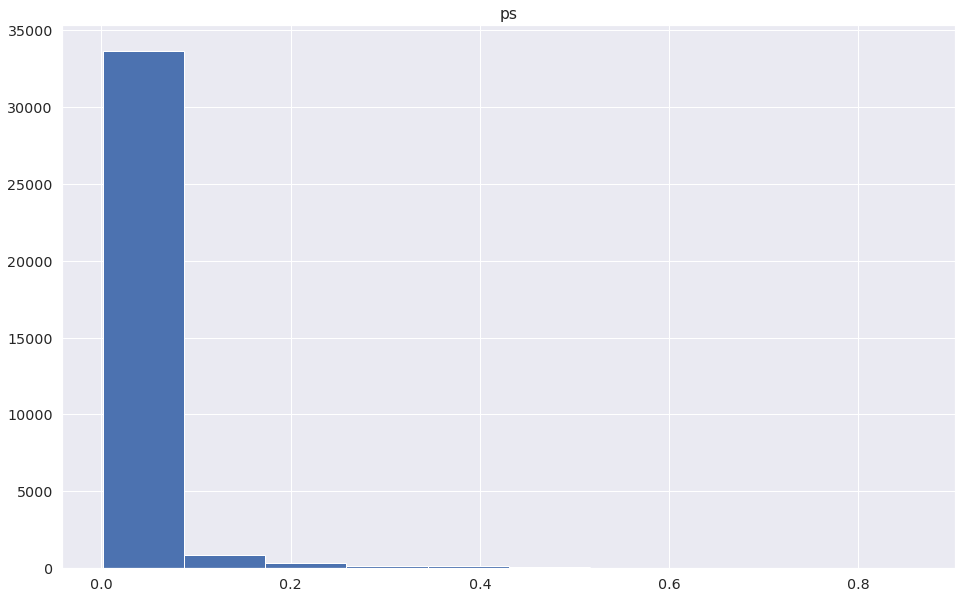

In [ ]:
features_complete.hist("ps")

In [ ]:
weighted_cohort_id = pd.read_csv('weighted_cohort_id.csv')

In [ ]:
weighted_cohort_id = weighted_cohort_id['stay_id'].tolist()

In [ ]:
weighted_cohort_id = weighted_cohort_id.sort()

In [ ]:
weighted_cohort = cohort_table[cohort_table.index.isin(weighted_cohort_id)]

In [ ]:
weighted_cohort

,stay_id,hadm_id,subject_id,age,Gender,ethnicity,midodrine,avg_doses_per_24_hrs,MICU,adm_weekday,...,resp_rate_mean,temperature_mean,spo2_mean,glucose_mean,sedative_use,ventilation_use,vasopressor_use,mortality,mort_28_day,admit_hour
1,32272859,25963696,11259141,60,1,WHITE,1,1.633333,0.0,7.0,...,17.333333,36.898333,97.259259,120.200000,1.0,1.0,1.0,0.0,0.0,18.0
2,34023828,21782431,18010960,59,0,UNKNOWN,1,1.589041,0.0,1.0,...,15.392857,36.786667,96.629630,98.000000,1.0,1.0,1.0,0.0,0.0,15.0
3,37798199,29764966,10926537,42,1,BLACK/AFRICAN AMERICAN,1,1.568627,0.0,7.0,...,17.240000,37.142857,99.791667,95.000000,1.0,1.0,1.0,0.0,0.0,17.0
4,32309766,29272306,15703353,59,1,WHITE,1,1.517241,0.0,6.0,...,21.740741,37.372000,98.178571,136.800000,1.0,1.0,1.0,0.0,0.0,3.0
5,32470068,29923619,12682108,32,1,WHITE,1,1.666667,0.0,3.0,...,16.187500,36.743750,97.437500,137.500000,0.0,1.0,1.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21146,37931684,23401888,16917096,76,0,WHITE,0,1.793103,0.0,1.0,...,14.548387,36.805000,98.225806,108.500000,0.0,1.0,1.0,1.0,0.0,21.0
21302,39661672,29736871,11343484,71,0,WHITE,0,1.515464,0.0,4.0,...,17.750000,36.823333,95.071429,142.500000,1.0,1.0,1.0,0.0,0.0,16.0
21328,39943884,24720945,16533974,63,0,UNKNOWN,0,1.500000,0.0,6.0,...,16.000000,35.560000,98.666667,NaN,1.0,NaN,1.0,1.0,0.0,22.0
21418,30827926,24899138,10570405,32,1,WHITE,0,1.375000,0.0,7.0,...,18.653846,36.798000,96.884615,94.750000,0.0,NaN,1.0,0.0,0.0,13.0


In [ ]:
mytable_weighted = TableOne(weighted_cohort, columns=table_columns, categorical=table_categorical, groupby=table_groupby, nonnormal=table_nonnormal, pval=True)

In [ ]:
print(mytable_weighted.tabulate(tablefmt = "fancy_grid"))

╒════════════════════════════════╤═══════════════════════════════╤═══════════╤══════════════════╤══════════════════╤══════════════════╤═══════════╕
│                                │                               │ Missing   │ Overall          │ 0                │ 1                │ P-Value   │
╞════════════════════════════════╪═══════════════════════════════╪═══════════╪══════════════════╪══════════════════╪══════════════════╪═══════════╡
│ n                              │                               │           │ 881              │ 368              │ 513              │           │
├────────────────────────────────┼───────────────────────────────┼───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│ age, median [Q1,Q3]            │                               │ 0         │ 63.0 [51.0,76.0] │ 63.0 [49.8,78.0] │ 64.0 [53.0,74.0] │ 0.683     │
├────────────────────────────────┼───────────────────────────────┼───────────┼──────────────────┼───────────────